In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.isotonic import IsotonicRegression
df = pd.read_csv('/Users/erenanbar/Desktop/internship_project/latency_predict/latency_data/ticketData_vs_latency.csv')
df.head(5)

,day,modelName,latency_avg,latency_max,latency_max_detection,ticket_size,total_size
0,2023-02-18,Arcadyan eLife Connect C1AA,22.5,24,0,0,1
1,2023-02-18,Arcadyan eLife Connect C1AA,24.0,25,0,0,1
2,2023-02-18,Arcadyan eLife Connect C1AA,25.5,28,0,0,1
3,2023-02-18,Arcadyan eLife Connect C1AA,27.0,27,0,0,2
4,2023-02-18,Arcadyan eLife Connect C1AA,29.0,29,0,0,1


In [51]:
df['latency_avg'].describe(percentiles=[0.9,0.95,0.99])

count    1.632302e+06
mean     3.237664e+02
std      3.455579e+02
min      1.000000e+00
50%      2.160000e+02
90%      5.536700e+02
95%      8.235000e+02
99%      1.733330e+03
max      8.870000e+03
Name: latency_avg, dtype: float64

In [52]:
bins = np.arange(0,551,50)
df['latency_avg_bin'] = pd.cut(df['latency_avg'], 
                   bins=bins,
                   labels=range(1,len(bins)))

df['latency_avg_bin'].value_counts(sort=False)

latency_avg_bin
1      31251
2      15109
3      77974
4     572827
5     348760
6      99024
7      74141
8      46182
9      42321
10     71064
11     88119
Name: count, dtype: int64

(array([ 31110.,  15131.,  74978., 574821., 348808.,  99640.,  74289.,
         46180.,  42493.,  71203.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

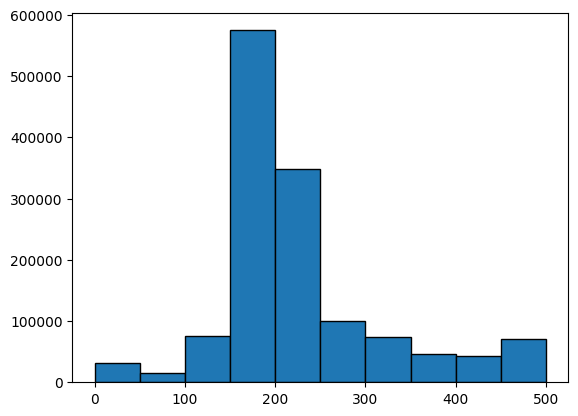

In [53]:
plt.hist(df['latency_avg'],bins=bins[:-1], edgecolor = 'black')

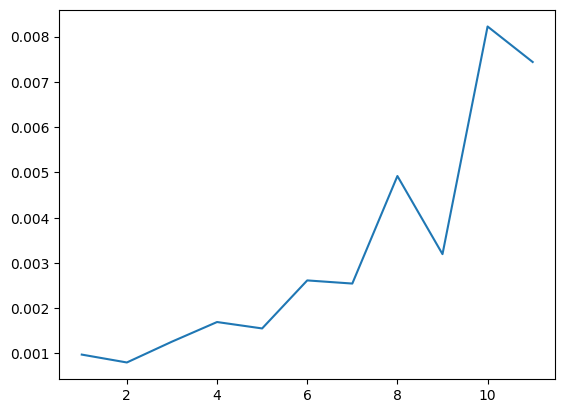

In [54]:
# calculate prob w.r.t. latency_avg 
df_grouped = df.groupby(['modelName','latency_avg_bin']).aggregate({'ticket_size':'sum','total_size':'sum'})
df_grouped['call_prob'] = df_grouped['ticket_size'] / df_grouped['total_size']
df_grouped = df_grouped.reset_index()

plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_avg_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'call_prob'])


In [58]:
from sklearn.linear_model import LinearRegression

for model in df_grouped['modelName'].unique():
    X = df_grouped.loc[df_grouped['modelName'] == model, 'latency_avg_bin']
    X = X.values.reshape(-1, 1)
    y = df_grouped.loc[df_grouped['modelName'] == model, 'call_prob'].fillna(0) 
    linear_regr = LinearRegression()
    linear_regr.fit(X, y)
    df_grouped.loc[df_grouped['modelName'] == model, 'prob_predict'] = linear_regr.predict(X)

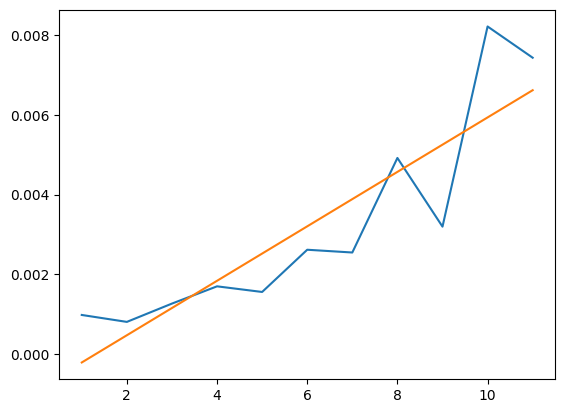

In [60]:
plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_avg_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'call_prob'])
plt.plot(df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'latency_avg_bin'], 
         df_grouped.loc[df_grouped['modelName'] == 'DLink DIR-853/ET', 'prob_predict'])

